## Sentiment analysis
The idea is to build each a Vectorizer with for all negative and for all positive words. In a next step we will go trough each comment(/row) and check how often each words appears in its text. Then we sum up those appearances and so get a score of 

$$ \text{# pos} - \text{# neg} = \text{"sentiment score"}$$

In [4]:
# Initialize libraries and data
%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

from time import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df_art = pd.read_csv('articles_2017_08.csv')
df_com = pd.read_csv('comments_2017_08.csv').sample(30000) # crop because battery life, skews data
# Make float better readable
pd.options.display.float_format = '{:.3f}'.format

df_com['score'] = df_com['vup'] - df_com['vdo']
df_com['contr'] = df_com['vup'] + df_com['vdo']

In [5]:
# https://de.wikipedia.org/wiki/Liste_der_h%C3%A4ufigsten_W%C3%B6rter_der_deutschen_Sprache
stop_words = "die, der, und, in, zu, den, das, nicht, von, sie, ist, des, sich, mit, dem, dass, er, es, ein, ich, auf, so, eine, auch, als, an, nach, wie, im, für, "
stop_words += "man, aber, aus, durch, wenn, nur, war, noch, werden, bei, hat, wir, was, wird, sein, einen, welche, sind, oder, zur, um, haben, einer, mir, über, ihm, diese, einem, ihr, uns, "
stop_words += "da, zum, kann, doch, vor, dieser, mich, ihn, du, hatte, seine, mehr, am, denn, nun, unter, sehr, selbst, schon, hier, "
stop_words += "bis, habe, ihre, dann, ihnen, seiner, alle, wieder, meine, Zeit, gegen, vom, ganz, einzelnen, wo, muss, ohne, eines, können, sei, "
stop_words += "nichts"
stop_words = stop_words.lower()
stop_words = stop_words.split(', ')

# Datasets from http://www.ulliwaltinger.de/sentiment/
from sklearn.feature_extraction.text import CountVectorizer

# TODO remove bigrams from the datasets?
columns = ['word1', 'word2', 'word class', 'pos/neg', '---', 'L/D']
df_words_pos = pd.read_csv('GermanPolarityClues-2012/GermanPolarityClues-Positive-21042012.tsv', delimiter='\t', names=columns)
df_words_neg = pd.read_csv('GermanPolarityClues-2012/GermanPolarityClues-Negative-21042012.tsv', delimiter='\t', names=columns)
#df_words_neg['word1'] = df_words_neg['word1'].str.lower()
#df_words_neg['word2'] = df_words_neg['word2'].str.lower()
#df_words_pos['word1'] = df_words_pos['word1'].str.lower()
#df_words_pos['word2'] = df_words_pos['word2'].str.lower()

# Build vocabulary
vect_pos = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)
vect_pos.fit(df_words_pos['word1'] + df_words_pos['word2'])
features_pos = vect_pos.get_feature_names()

vect_neg = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)
vect_neg.fit(df_words_neg['word1'] + df_words_neg['word2'])
features_neg = vect_neg.get_feature_names()

done in 12.468s


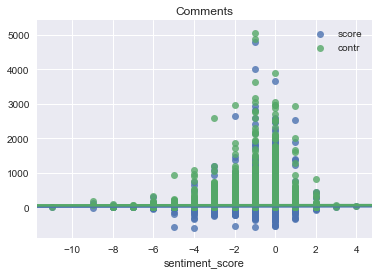

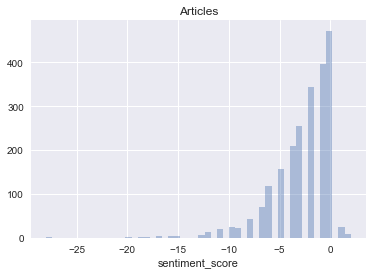

In [6]:
# Compute "sentiment scores" for all comments
t0 = time()
def get_sentiment_score(text):
    matr_pos = vect_pos.transform([text])
    sum_pos = matr_pos.data.sum()
    
    matr_neg = vect_neg.transform([text])
    sum_neg = matr_neg.data.sum()
    
    #for i in matr_neg.indices:
        #print(features_neg[i])
    return sum_pos - sum_neg

#df_com = df_com[df_com['score']<1000]
df_art = df_art[df_art['text'].notnull()]

df_com['sentiment_score'] = df_com['con'].apply(get_sentiment_score)
df_art['sentiment_score'] = df_art['text'].apply(get_sentiment_score)
#get_sentiment_score(df_com['con'].loc[46463])
print("done in {:.3f}s".format(time() - t0))

# Plot scores
sns.regplot(x='sentiment_score', y='score', data=df_com, label='score')
ax = sns.regplot(x='sentiment_score', y='contr', data=df_com, label='contr')
ax.legend()
plt.ylabel('')
plt.title('Comments')
plt.show()


ax = sns.distplot(df_art['sentiment_score'], kde=False)
plt.title('Articles')
plt.show()

In [8]:
# Comment with highest sentiment score
max_score = df_com['sentiment_score'].max()
min_score = df_com['sentiment_score'].min()
print(df_com[df_com['sentiment_score'] == max_score]['con'].values[0])
print()
print(df_com[df_com['sentiment_score'] == min_score]['con'].values[0])

#min_score = df_art['sentiment_score'].min()
#print(df_art[df_art['sentiment_score'] == min_score]['text'].values)

 Es gab die eine oder andere Situation wo der Ref (und nicht der VAR!) trotz Beweis falsch entschieden hat. Das System ist soweit, abgesehen von den artezeiten, völlig ok (in anderen Sportarten gibt es auch lange Wartezeiten...) Trotzdem finde ich es falsch alles schlecht zu reden! Viele Situationen wurden dank dem Video-Beweis geklärt resp. noch besser sind gar nicht erst zustande gekommen (Tätlichkeiten etc...) Man findet immer was etwas neues schlecht zu reden, im Grossen und Ganzen finde ich aber dass der VAR erfolgreich war und, verbessert, nicht mehr wegzudenken ist. 

 Sofern du wirklich der bist wie dein Name sagt verstehe ich deine Aussage nicht ganz... die ganzen Nachweise welche ein Landwirt  erbringen muss, da würdest du den Überblick verlieren. Ein Landwirt ist ein Unternehmer und wenn er keinen Anreiz (Direktzahlungen) bekommen würde, möchte ich nicht wissen wie die Schweiz in ein paar Jahren aussieht. Ich rate dir mal die Vorschriften zu lesen, welche einem Landwirten au

### Summary so far
The results are not compelling.

I will try with a different sentiment dictionary and compare the results.